In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'lazio'

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,12,Lazio,1,1,2,0,2,0,0,...,0.0,0.0,0.0,0.0,50.00,100.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,12,Lazio,0,0,0,0,0,-2,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,-100.00,-100.00
2,2020-02-27T18:00:00,12,Lazio,0,0,0,0,0,0,0,...,0.0,428.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,12,Lazio,0,0,0,0,0,0,0,...,0.0,59.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,12,Lazio,3,0,3,0,3,3,3,...,0.0,68.0,0.0,0.0,0.00,100.00,4.41,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2021-03-09T17:00:00,12,Lazio,2049,261,2310,36267,38577,651,1431,...,28.0,40732.0,20006.0,616.0,11.30,5.99,3.51,7.15,3.16,1.72
379,2021-03-10T17:00:00,12,Lazio,2076,267,2343,36533,38876,299,1654,...,22.0,38401.0,22482.0,266.0,11.40,6.03,4.31,7.36,2.30,0.78
380,2021-03-11T17:00:00,12,Lazio,2088,258,2346,36992,39338,462,1800,...,16.0,39342.0,23101.0,459.0,11.00,5.96,4.58,7.79,-3.37,1.19
381,2021-03-12T17:00:00,12,Lazio,2128,270,2398,37916,40314,976,1757,...,24.0,38475.0,22002.0,924.0,11.26,5.95,4.57,7.99,4.65,2.48


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 13, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1998
Nuovi tamponi: 42167.0
Percentuale nuovi positivi/nuovi tamponi: 4.7 %
Nuovi guariti: 788.0
Nuovi deceduti: 19.0
Variazione positivi ricoverati con sintomi: 44.0
Variazione positivi in terapia intensiva: 8.0
Variazione positivi in isolamento dimiciliare: 1139.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 13, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-12T17:00:00,12,Lazio,2871,326,3197,75390,78587,-294,1381,...,42.0,13201.0,4896.0,-283.0,10.20,4.07,10.46,28.21,1.56,-0.37
1,2021-01-13T17:00:00,12,Lazio,2892,313,3205,75018,78223,-364,1612,...,41.0,13678.0,6504.0,-372.0,9.77,4.10,11.79,24.78,-3.99,-0.46
2,2021-01-14T17:00:00,12,Lazio,2814,295,3109,74871,77980,-243,1816,...,47.0,14005.0,6972.0,-147.0,9.49,3.99,12.97,26.05,-5.75,-0.31
3,2021-01-15T17:00:00,12,Lazio,2780,299,3079,74676,77755,-225,1394,...,36.0,28242.0,16200.0,-195.0,9.71,3.96,4.94,8.60,1.36,-0.29
4,2021-01-16T17:00:00,12,Lazio,2792,286,3078,74298,77376,-379,1282,...,36.0,29848.0,15106.0,-378.0,9.29,3.98,4.30,8.49,-4.35,-0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-03-09T17:00:00,12,Lazio,2049,261,2310,36267,38577,651,1431,...,28.0,40732.0,20006.0,616.0,11.30,5.99,3.51,7.15,3.16,1.72
57,2021-03-10T17:00:00,12,Lazio,2076,267,2343,36533,38876,299,1654,...,22.0,38401.0,22482.0,266.0,11.40,6.03,4.31,7.36,2.30,0.78
58,2021-03-11T17:00:00,12,Lazio,2088,258,2346,36992,39338,462,1800,...,16.0,39342.0,23101.0,459.0,11.00,5.96,4.58,7.79,-3.37,1.19
59,2021-03-12T17:00:00,12,Lazio,2128,270,2398,37916,40314,976,1757,...,24.0,38475.0,22002.0,924.0,11.26,5.95,4.57,7.99,4.65,2.48


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

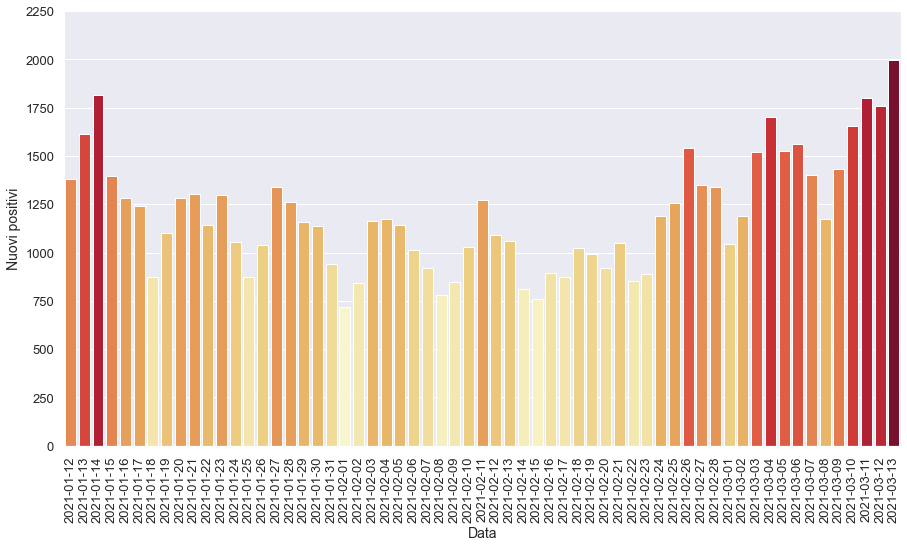

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

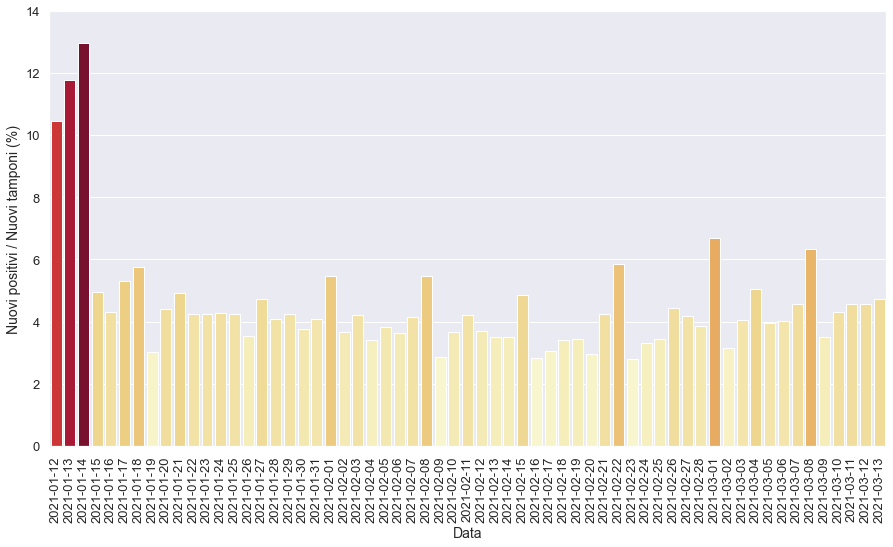

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

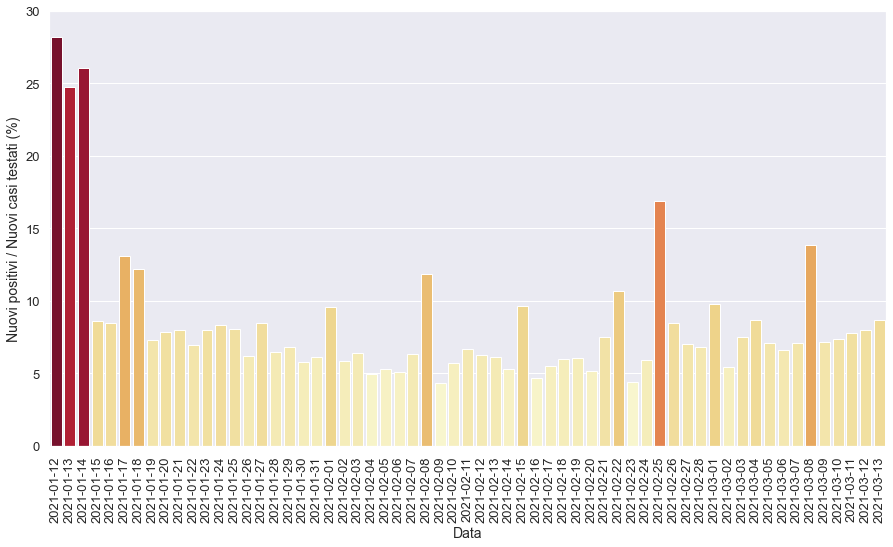

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

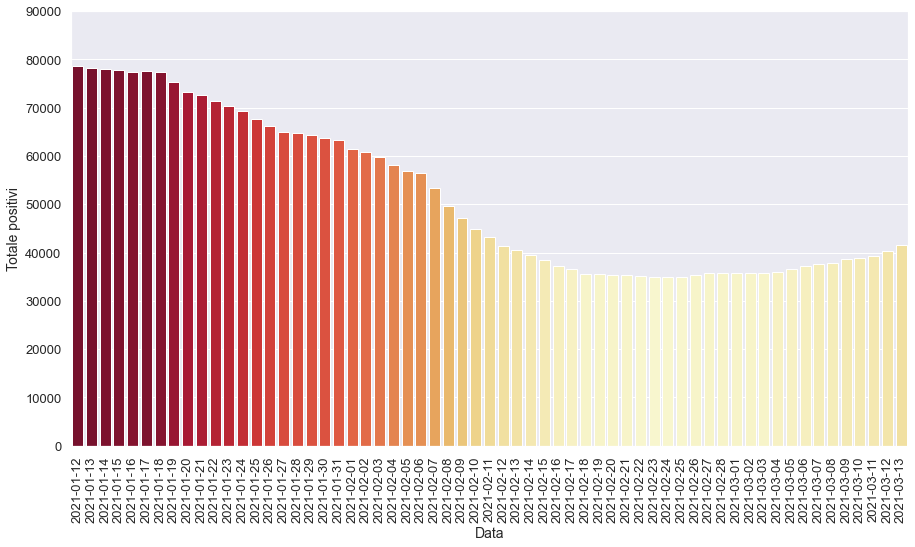

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

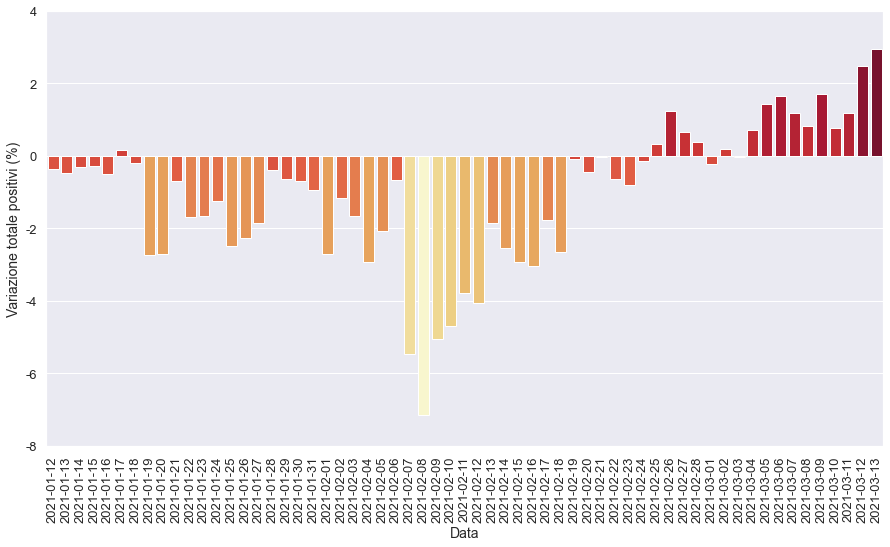

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

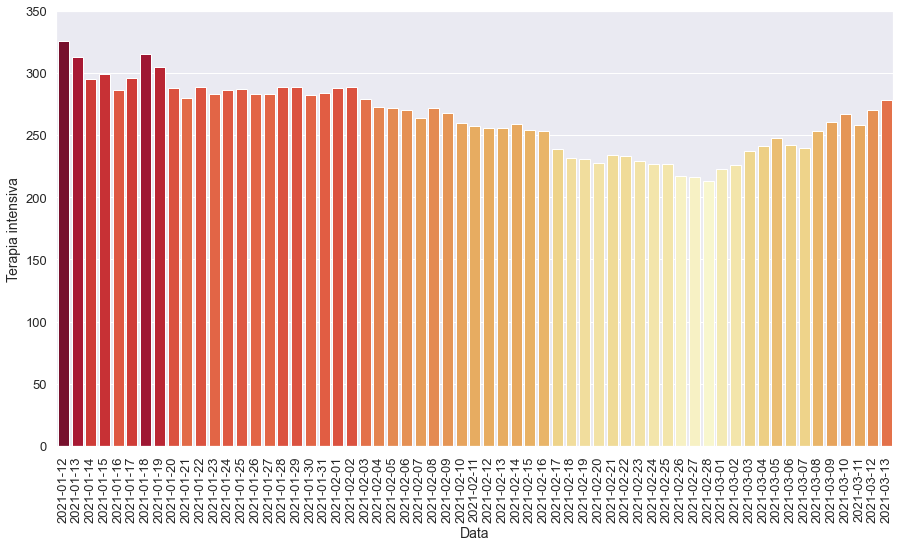

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

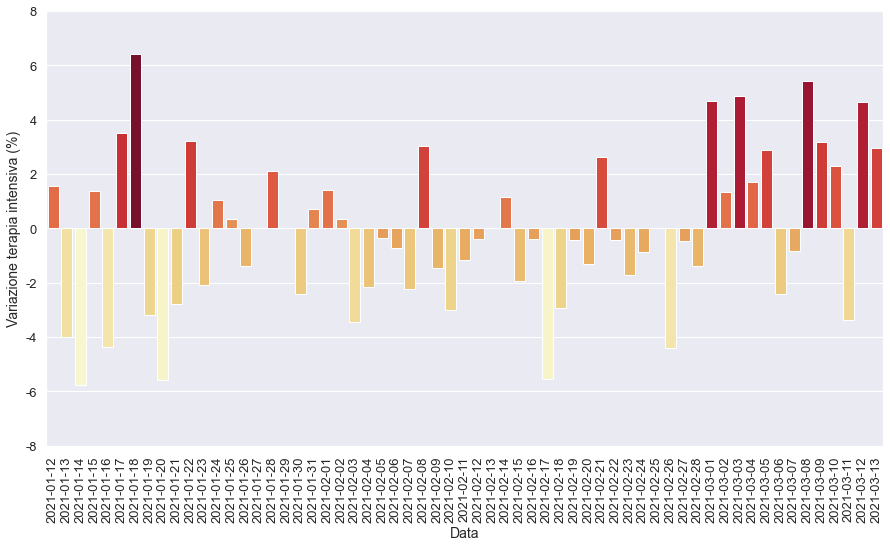

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

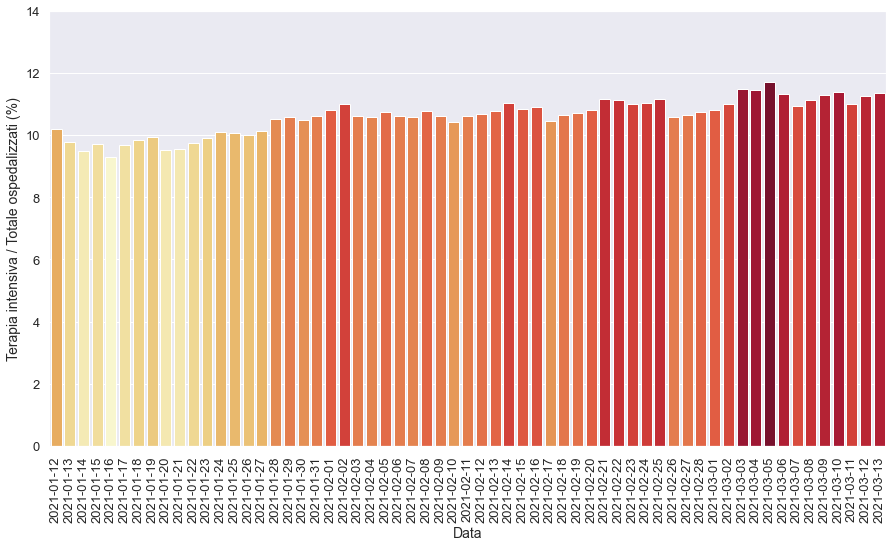

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

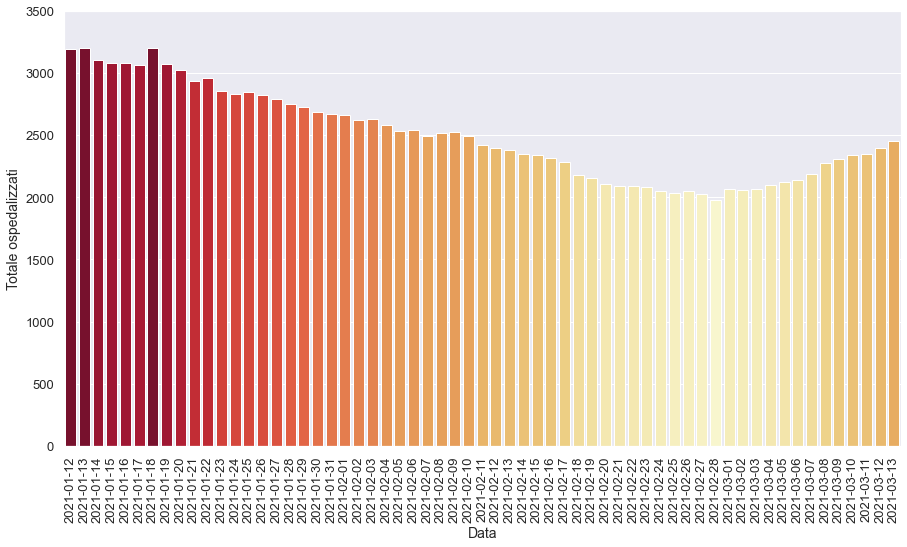

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

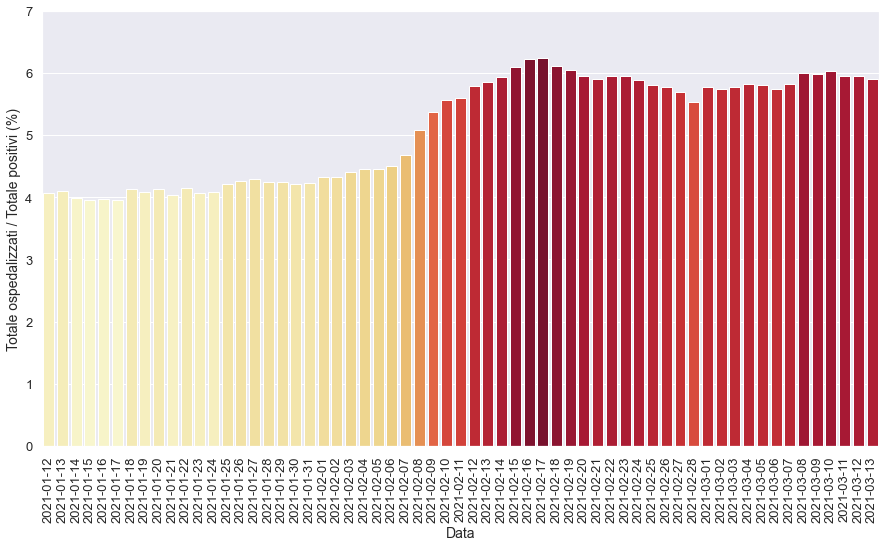

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

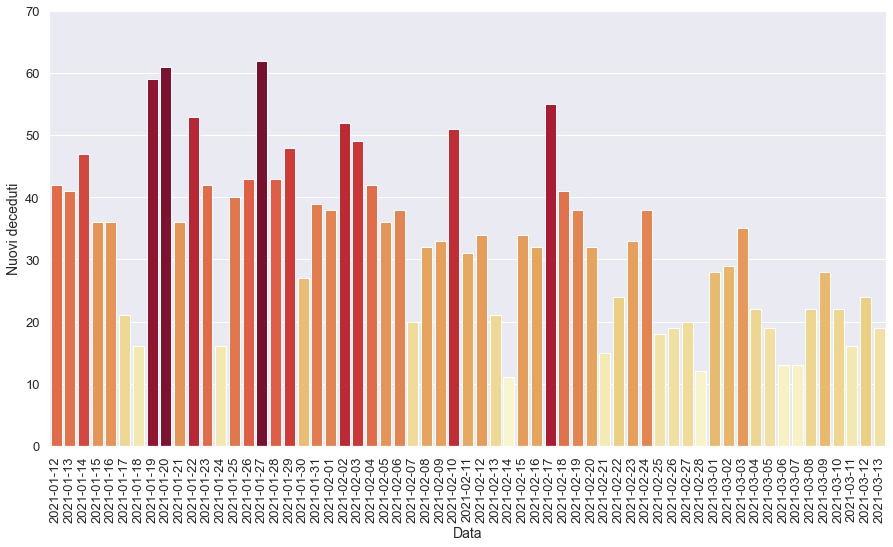

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

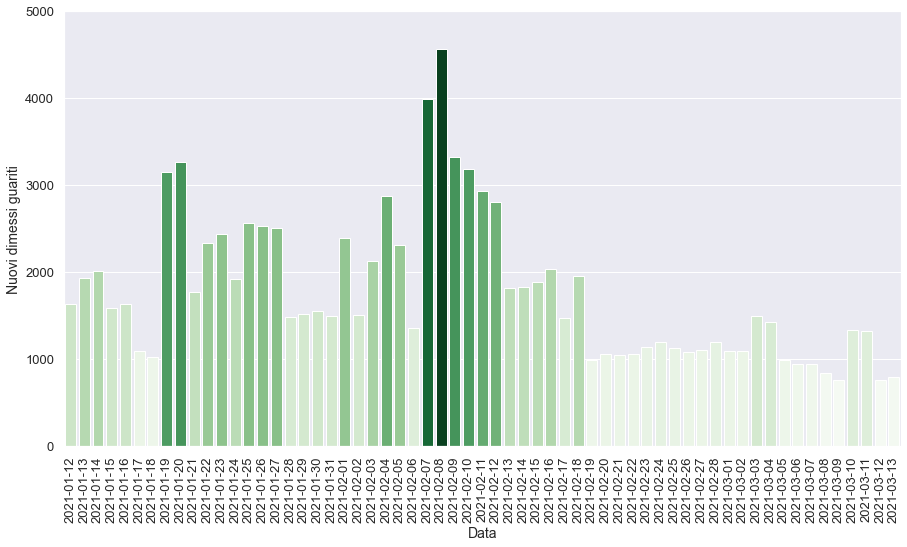

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-11T17:00:00,12,Lazio,2160,257,2417,40727,43144,-1690,1271,...,31.0,30209.0,19021.0,-1614.0,10.63,5.60,4.21,6.68,-1.15,-3.77
1,2021-02-12T17:00:00,12,Lazio,2140,256,2396,38997,41393,-1751,1089,...,34.0,29630.0,17463.0,-1730.0,10.68,5.79,3.68,6.24,-0.39,-4.06
2,2021-02-13T17:00:00,12,Lazio,2121,256,2377,38245,40622,-771,1060,...,21.0,30188.0,17236.0,-752.0,10.77,5.85,3.51,6.15,0.00,-1.86
3,2021-02-14T17:00:00,12,Lazio,2092,259,2351,37238,39589,-1033,809,...,11.0,23091.0,15236.0,-1007.0,11.02,5.94,3.50,5.31,1.17,-2.54
4,2021-02-15T17:00:00,12,Lazio,2090,254,2344,36086,38430,-1159,760,...,34.0,15654.0,7904.0,-1152.0,10.84,6.10,4.85,9.62,-1.93,-2.93
5,2021-02-16T17:00:00,12,Lazio,2065,253,2318,34943,37261,-1169,894,...,32.0,31499.0,19070.0,-1143.0,10.91,6.22,2.84,4.69,-0.39,-3.04
6,2021-02-17T17:00:00,12,Lazio,2044,239,2283,34324,36607,-654,871,...,55.0,28438.0,15867.0,-619.0,10.47,6.24,3.06,5.49,-5.53,-1.76
7,2021-02-18T17:00:00,12,Lazio,1945,232,2177,33461,35638,-969,1025,...,41.0,29941.0,17100.0,-863.0,10.66,6.11,3.42,5.99,-2.93,-2.65
8,2021-02-19T17:00:00,12,Lazio,1925,231,2156,33452,35608,-30,990,...,38.0,28867.0,16296.0,-9.0,10.71,6.05,3.43,6.08,-0.43,-0.08
9,2021-02-20T17:00:00,12,Lazio,1883,228,2111,33335,35446,-162,921,...,32.0,31269.0,17792.0,-117.0,10.80,5.96,2.95,5.18,-1.30,-0.45


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

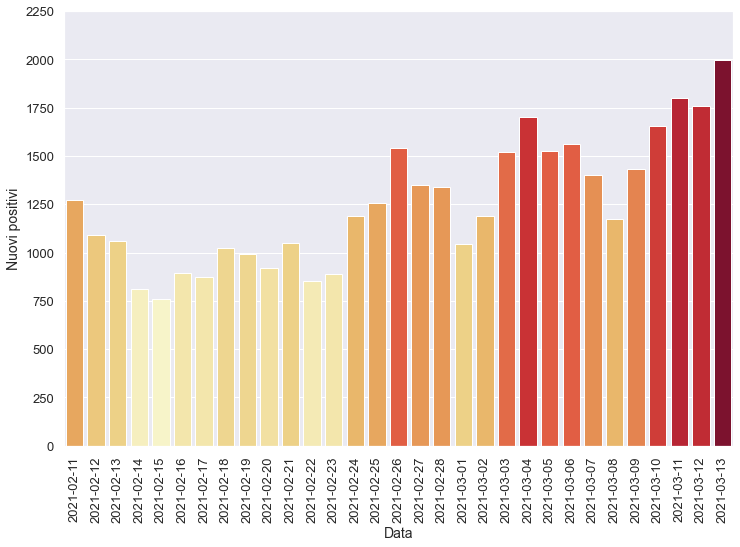

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

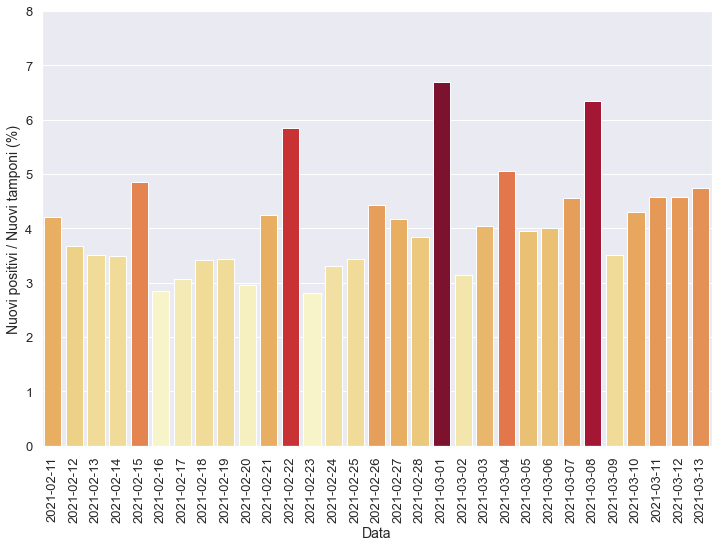

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

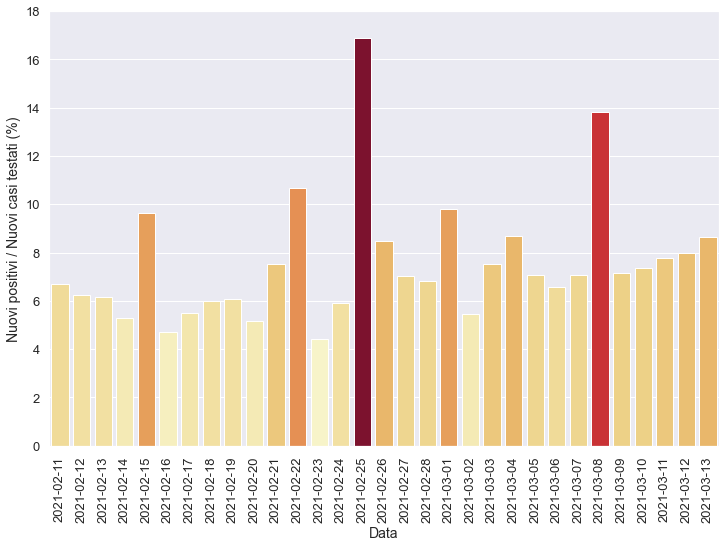

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

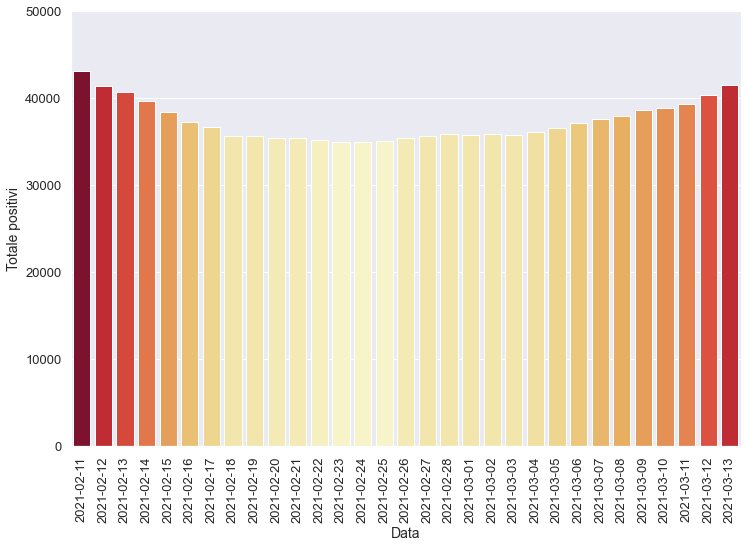

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

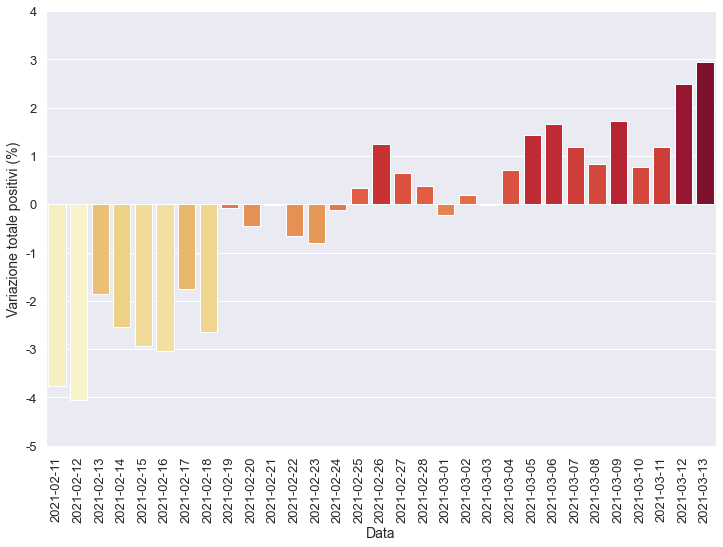

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

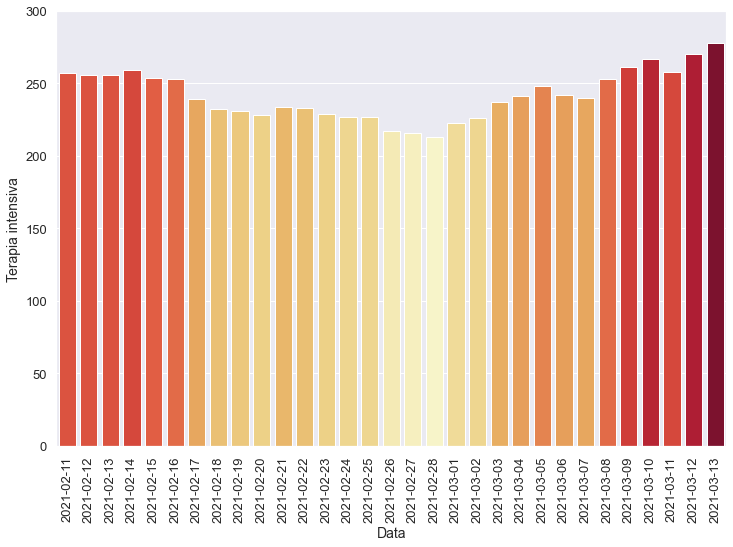

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

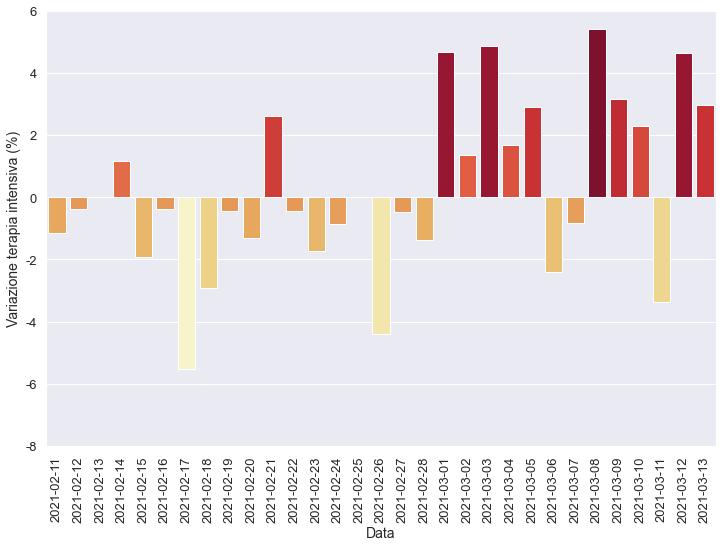

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

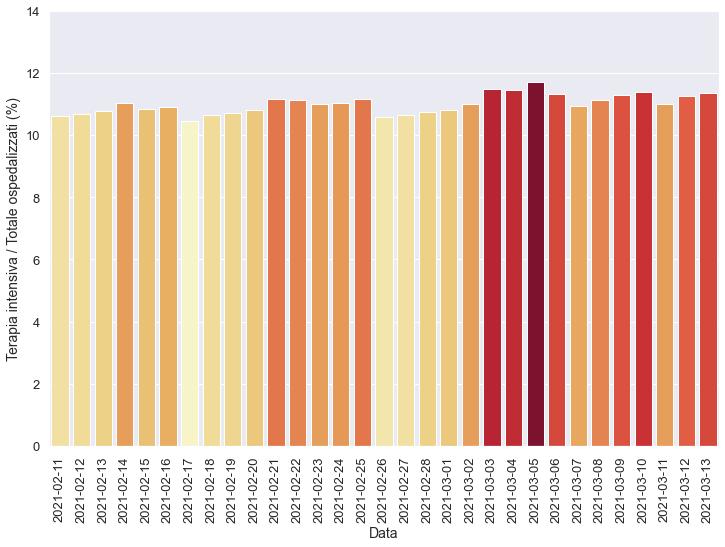

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

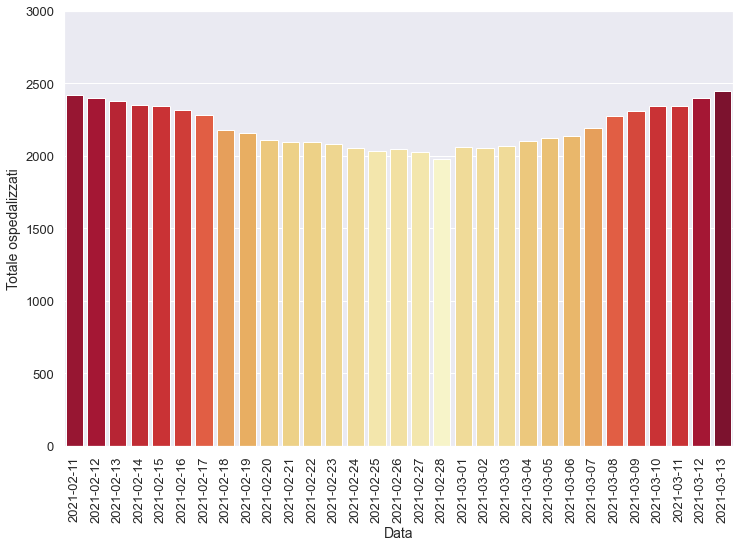

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

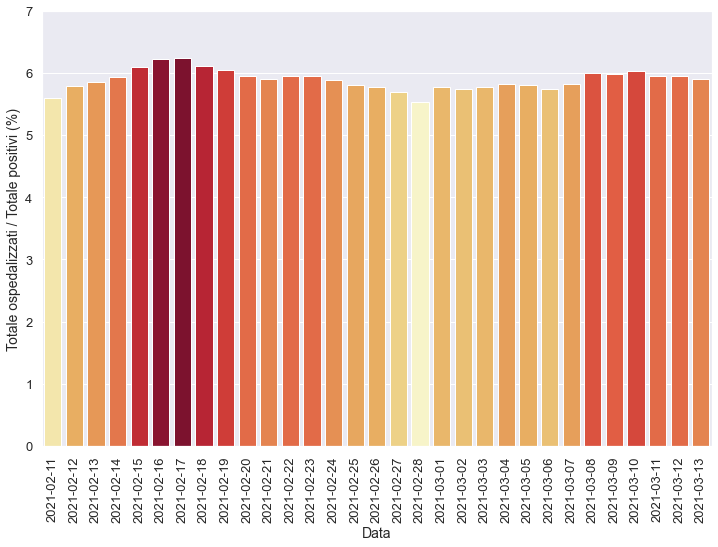

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

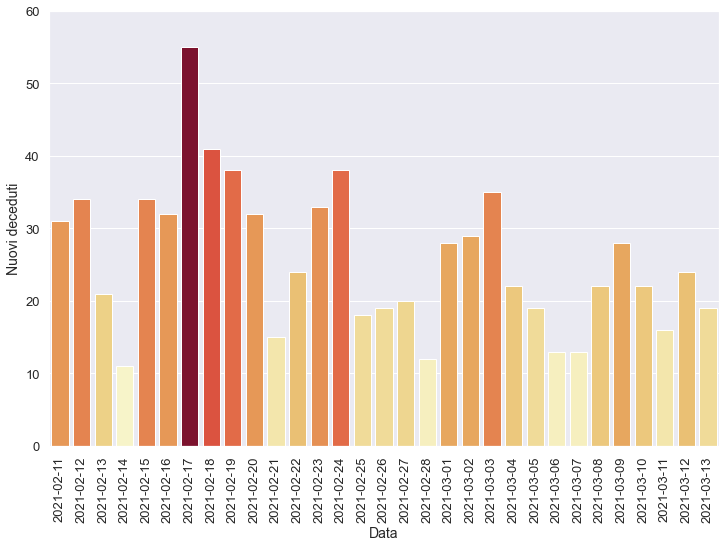

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

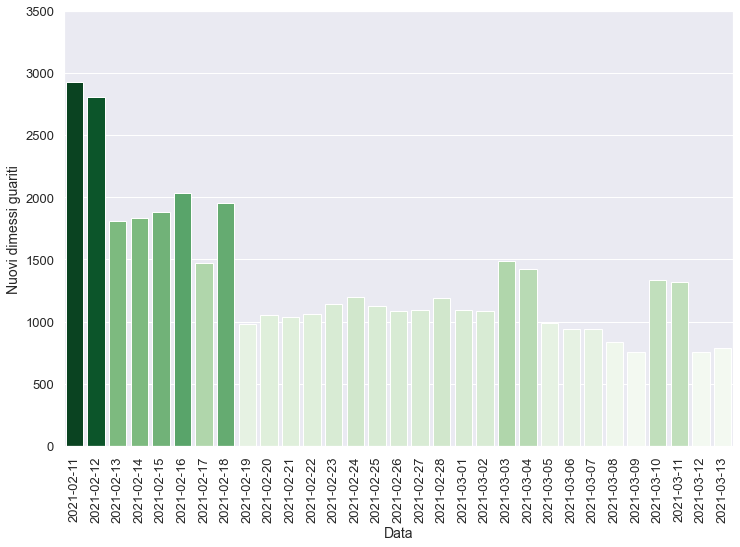

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-06T17:00:00,12,Lazio,1896,242,2138,35031,37169,607,1563,...,13.0,38998.0,23740.0,589.0,11.32,5.75,4.01,6.58,-2.42,1.66
1,2021-03-07T17:00:00,12,Lazio,1951,240,2191,35421,37612,443,1399,...,13.0,30777.0,19740.0,390.0,10.95,5.83,4.55,7.09,-0.83,1.19
2,2021-03-08T17:00:00,12,Lazio,2022,253,2275,35651,37926,314,1175,...,22.0,18535.0,8501.0,230.0,11.12,6.00,6.34,13.82,5.42,0.83
3,2021-03-09T17:00:00,12,Lazio,2049,261,2310,36267,38577,651,1431,...,28.0,40732.0,20006.0,616.0,11.30,5.99,3.51,7.15,3.16,1.72
4,2021-03-10T17:00:00,12,Lazio,2076,267,2343,36533,38876,299,1654,...,22.0,38401.0,22482.0,266.0,11.40,6.03,4.31,7.36,2.30,0.78
5,2021-03-11T17:00:00,12,Lazio,2088,258,2346,36992,39338,462,1800,...,16.0,39342.0,23101.0,459.0,11.00,5.96,4.58,7.79,-3.37,1.19
6,2021-03-12T17:00:00,12,Lazio,2128,270,2398,37916,40314,976,1757,...,24.0,38475.0,22002.0,924.0,11.26,5.95,4.57,7.99,4.65,2.48
7,2021-03-13T17:00:00,12,Lazio,2172,278,2450,39055,41505,1191,1998,...,19.0,42167.0,23103.0,1139.0,11.35,5.90,4.74,8.65,2.96,2.95


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

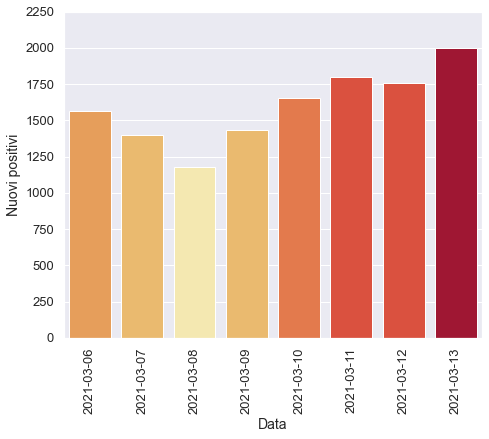

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

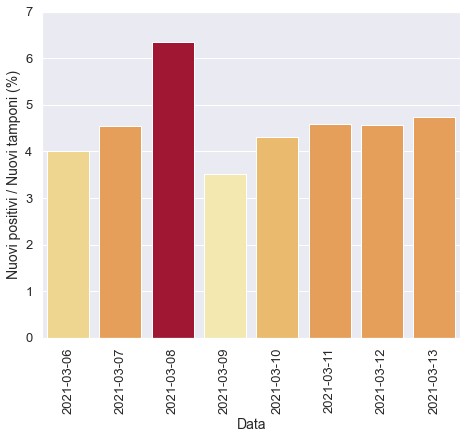

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

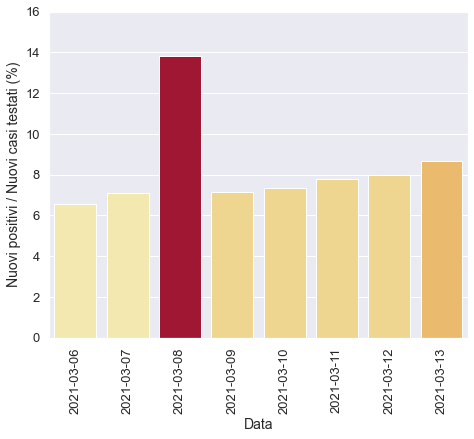

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

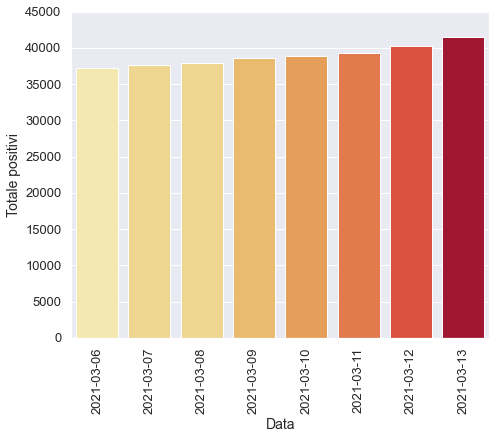

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

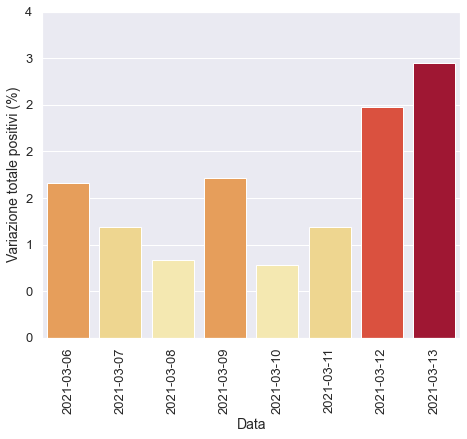

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

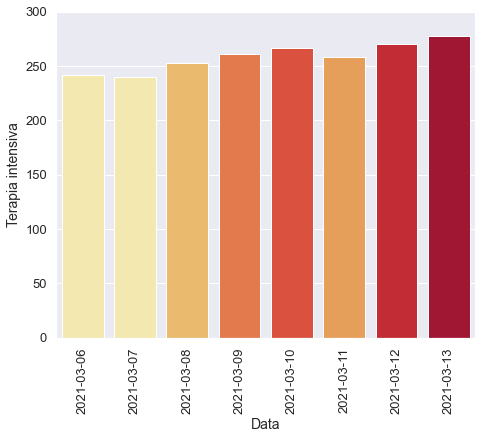

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

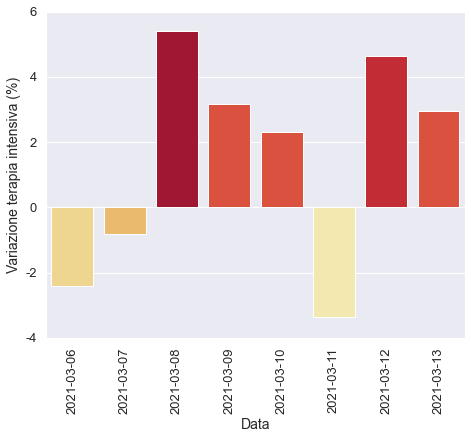

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

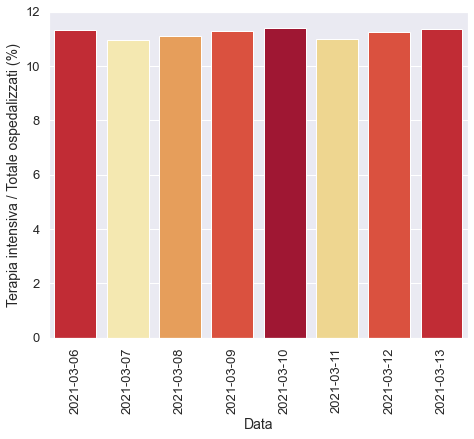

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

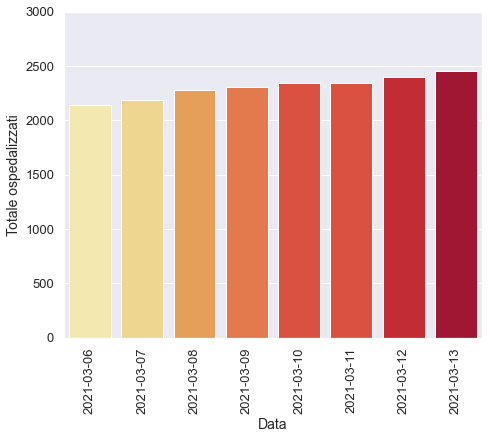

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

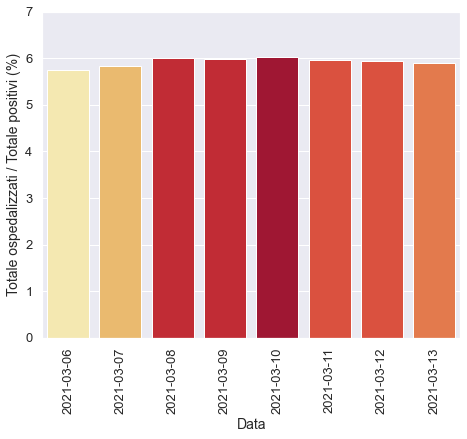

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

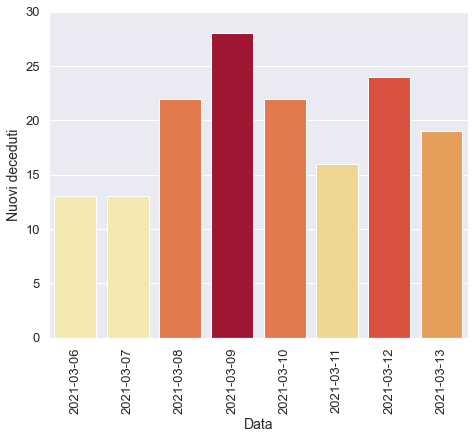

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

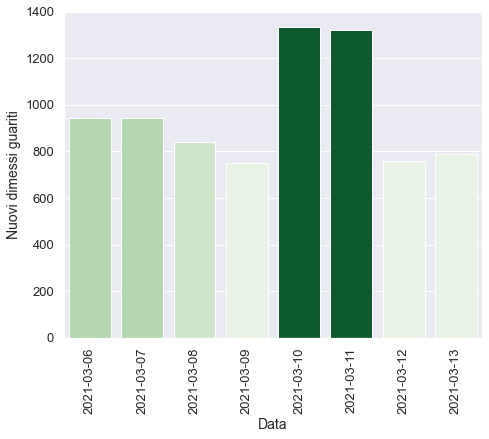

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)